# Homework 2

## #Group16 :
+ **Dilara Isikli**
+ **Luca Avitabile**
+ **Riccardo Ceccaroni**

----

**Import Library:**

In [1]:
import json
import pandas as pd
from matplotlib.font_manager import FontProperties 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from scipy.stats import chi2_contingency
import matplotlib.cm as cm
import matplotlib as mpl
import statsmodels.api as sm
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import operator
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
import seaborn

**Import Dataset:**

In [2]:
players = pd.read_json(r"players.json", orient = 'record')
teams = pd.read_json(r"teams.json", orient = 'record')
coaches = pd.read_json(r"coaches.json", orient = 'record')
premier_league_events = pd.read_json(r"events_England.json", orient = 'record')
premier_league_matches = pd.read_json(r"matches_England.json", orient = 'record')

laliga_events = pd.read_json(r'events_Spain.json', orient = 'record')
laliga_matches = pd.read_json(r'matches_Spain.json', orient = 'record')

serie_a_events = pd.read_json(r'events_Italy.json', orient = 'record')
serie_a_matches = pd.read_json(r'matches_Italy.json', orient = 'record')

----

## RQ1

In [3]:
premier_league_matches_sorted_by_week = premier_league_matches.sort_values(by=['gameweek'], ascending=True) #sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
for index, match in premier_league_matches_sorted_by_week.iterrows():# premier_league_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
  

    #calculate previous points for teams of home and away
    if gameweek > 1: 
        previous_points_home = premier_league_by_week[gameweek-1][home_id]['points']
        previous_points_away = premier_league_by_week[gameweek-1][away_id]['points']
   
    #compare score to decide gaing points for teams of home and away
    if home_score > away_score: 
        home_points = 3
        away_points = 0
    elif away_score > home_score:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
        
    home_name = teams[teams["wyId"] == home_id].name.values[0]  #make equale wyId to home_id and take home name
    away_name = teams[teams["wyId"] == away_id].name.values[0]  #make equale wyId to home_id and take away name
    
    if home_name not in teams_list:
        teams_list.append(home_name)
    if gameweek not in gameweek_list:
        gameweek_list.append(gameweek)
    if gameweek in premier_league_by_week:
        premier_league_by_week[gameweek][home_id] = {'team_name' : home_name, 'points' : home_points + previous_points_home }
        premier_league_by_week1[gameweek][home_name] = {'points' : home_points  }
    else:
        premier_league_by_week[gameweek] = {home_id: {'team_name' : home_name, 'points' : home_points + previous_points_home}}
        premier_league_by_week1[gameweek] = {home_name: {'points' : home_points}}
    premier_league_by_week[gameweek][away_id] = {'team_name' : away_name, 'points' : away_points + previous_points_away }
    premier_league_by_week1[gameweek][away_name] = {'points' : away_points  }
    

+ **Find first two longest winning streaks:**

In [4]:
def longestWinningStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==3):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)

WinningStreakAllTeam = {}
var1 = ''
List_WinningStreakAllTeam = []
for j in range(len(teams_list)):
    WinningStreakAllTeam =longestWinningStreak(teams_list[j])
    var1 = WinningStreakAllTeam[teams_list[j]]
    #print(var1)
    List_WinningStreakAllTeam.append(str(var1))

firstMax = 0
secondMax = 0
for i in range(20):
    if (    int(List_WinningStreakAllTeam[i]) > int(firstMax) ):
        firstMax = int(List_WinningStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_WinningStreakAllTeam[i]) > secondMax and int(List_WinningStreakAllTeam[i]) != firstMax ):
        secondMax = int(List_WinningStreakAllTeam[i])
        #print(secondMax)
        
#print(secondMax)
#print(firstMax)
print('First Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(firstMax)):
        print(teams_list[m], firstMax)

print('Second Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(secondMax)):
        print(teams_list[m], secondMax)
   

First Team/Teams Of Longest Winning Streak
Manchester City 18
Second Team/Teams Of Longest Winning Streak
Tottenham Hotspur 7


+ **Find first two longest losing streaks:**

In [5]:
def longestLosingStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==0):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)


LosingStreakAllTeam = {}
var2 = ''
List_LosingStreakAllTeam = []
for k in range(len(teams_list)):
    LosingStreakAllTeam =longestLosingStreak(teams_list[k])
    var2 = LosingStreakAllTeam[teams_list[k]]
    List_LosingStreakAllTeam.append(str(var2))
    
firstMin = 0
secondMin = 0
for i in range(20):
    if (    int(List_LosingStreakAllTeam[i]) > int(firstMin) ):
        firstMin = int(List_LosingStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_LosingStreakAllTeam[i]) > secondMin and int(List_LosingStreakAllTeam[i]) != firstMin ):
        secondMin = int(List_LosingStreakAllTeam[i])

print('First Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(firstMin)):
        print(teams_list[m], firstMin)

print('Second Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(secondMin)):
        print(teams_list[m], secondMin)

First Team/Teams Of Longest Losing Streak
West Bromwich Albion 8
Second Team/Teams Of Longest Losing Streak
Crystal Palace 7


+ **Create A Dictionary With All Teams And Points For All Gameweeks And Create Plot:**

In [6]:
#create a dictionary with all teams and points for all gameweeks (we need these because of show values on plot)
dict_points = {}
for index,week in premier_league_by_week.items(): #premier_league_by_week is a dic 
    for key, team in week.items():
        if index == 1:
            dict_points[team['team_name']] = [] #define key for points dic
            dict_points[team['team_name']].append(team['points']) #append points for the team
        else:
            dict_points[team['team_name']].append(team['points']) #append points for the team

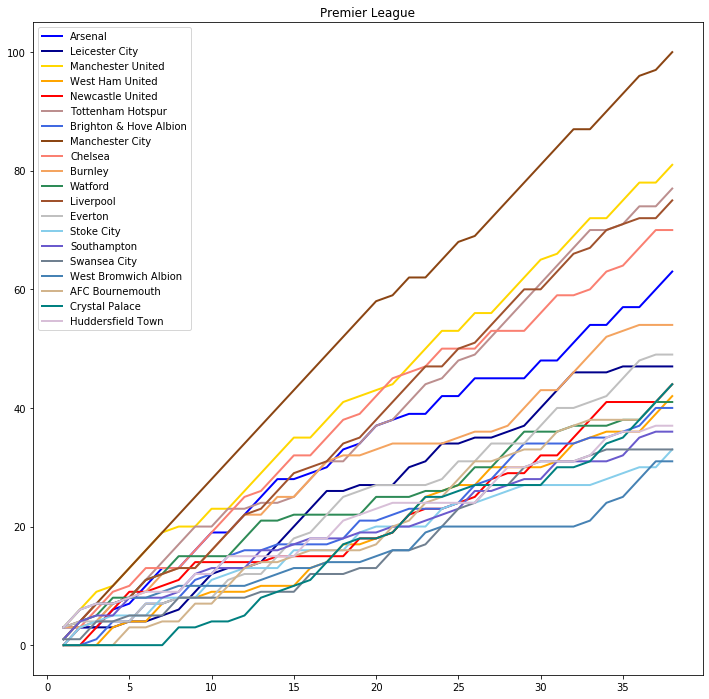

In [7]:
color_names = ['blue', 'darkblue','gold', 'orange','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown',
               'seagreen','sienna','silver','skyblue','slateblue','slategray','steelblue','tan','teal','thistle',
               'tomato','turquoise','violet','wheat','white','whitesmoke','yellow','yellowgreen']


fontP = FontProperties()
fontP.set_size('medium')
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
i = 0
for key,element in dict_points.items():
    ax.plot(gameweek_list,list(element) ,c= color_names[i],ls='-',label=key, linewidth=2)
    i +=1
plt.title('Premier League')
plt.legend(prop=fontP)
plt.show()

---

## RQ2

In [8]:
# create a pandas dataframe with the teams playing at home/away
home_away = {}
for i in range(len(premier_league_matches['teamsData'])):
    home_away[i] = {}
    for x in premier_league_matches['teamsData'][i]:
        if premier_league_matches['teamsData'][i][x]['side'] == 'home':
            home_away[i].update({'home': x})
        else:
            home_away[i].update({'away': x})
home_away = pd.DataFrame(home_away).transpose()

In [9]:
# add home_away dataframe to Matches and select the columns for problem 1:
premier_league_matches_home_away = premier_league_matches.join(home_away)
subMatches = premier_league_matches_home_away[[ 'winner', 'home', 'away']]

In [10]:
#TeamL=list(set(subMatches['home']))

In [11]:
TeamL=list(set(subMatches['home']))

def TeamFrame(codeTeam):
    homeM = subMatches[(subMatches['home']==codeTeam)]
    awayM = subMatches[(subMatches['away']==codeTeam)]
    homeM_list=[]

    for i in range(len(homeM)):
        if(homeM.iloc[i]['winner']==int(homeM.iloc[i]['home'])):
            homeM_list.append('home_win')
        elif(homeM.iloc[i]['winner']==0):
            homeM_list.append('home_draw')
        else:
            homeM_list.append('home_lost')
    for i in range(len(awayM)):
        if(awayM.iloc[i]['winner']==int(awayM.iloc[i]['away'])):
            homeM_list.append('away_win')
        elif(awayM.iloc[i]['winner']==0):
            homeM_list.append('away_draw')
        else:
            homeM_list.append('away_lost')
    name = [codeTeam for i in range(38)]
    TeamFrame = pd.DataFrame(zip(name,homeM_list), columns = ['Team', 'Info'])
    
    return TeamFrame

Final = pd.concat([TeamFrame(codeTeam) for codeTeam in TeamL[-5:]])

In [12]:
Final['Team'] = pd.to_numeric(Final['Team'])

In [13]:
Final = pd.merge(Final,teams[['wyId','officialName']], left_on='Team', right_on='wyId')

In [14]:
Final = pd.crosstab(Final.officialName,Final.Info)
Final.transpose()

officialName,Crystal Palace FC,Leicester City FC,Liverpool FC,Manchester United FC,Stoke City FC
Info,,,,,
away_draw,6,5,5,4,7
away_lost,9,9,5,5,10
away_win,4,5,9,10,2
home_draw,5,6,7,2,5
home_lost,7,6,0,2,9
home_win,7,7,12,15,5


In [15]:
chi2_contingency(Final)

(33.37718874480888,
 0.030659704054562763,
 20,
 array([[5.4, 7.6, 6. , 5. , 4.8, 9.2],
        [5.4, 7.6, 6. , 5. , 4.8, 9.2],
        [5.4, 7.6, 6. , 5. , 4.8, 9.2],
        [5.4, 7.6, 6. , 5. , 4.8, 9.2],
        [5.4, 7.6, 6. , 5. , 4.8, 9.2]]))

----

## RQ3

In [16]:
# Add column 'Country' on Teams
country = pd.DataFrame([x['name'] for x in teams['area']],columns=['Country'])
teams_country = pd.merge(teams, country, left_index=True, right_index=True)
teams_england = teams_country[((teams_country['Country'] == 'England') | 
                               (teams_country['Country'] == 'Wales')) & (teams_country['type'] == 'club')]

In [17]:
# Add column 'Age' on Coaches
current_date = datetime.now().date()
age = []
for x in coaches['birthDate']:
    # because some coach doesn't have the birthDate
    try:
        age.append(int((current_date - date.fromisoformat(x)).days // 365))
    except:
        age.append(0)
age = pd.DataFrame(age, columns=['Age'], dtype=int)
coaches_age = pd.merge(coaches, age, left_index=True, right_index=True)

In [18]:
# check teams coaches in Matches and create pandas dataframe Coaches_Teams_England
teams_coaches = []
# for every matches we take the coach and put it in teams_coaches
for x in (premier_league_matches['teamsData']):
    for y in x:
        teams_coaches.append({'Team':x[y]['teamId'], 'Coach':x[y]['coachId']})
teams_coaches = pd.DataFrame(teams_coaches)

# merge coaches with teams_coaches
coaches_teams_england = pd.merge(teams_coaches, coaches_age[['currentTeamId', 'birthDate','Age','wyId']], left_on='Coach', right_on='wyId')
#merge Teams with Coaches_teams_England
coaches_teams_england = pd.merge(coaches_teams_england, teams_england[['wyId', 'officialName']], left_on='Team', right_on='wyId' )

'''
Clean DataFrame:
1) remove duplicate row
2) sort by birthDate
3) remove duplicate row with the same officialName and keep last == the youngest coach
''' 
coaches_teams_england = coaches_teams_england.drop_duplicates()
coaches_teams_england = coaches_teams_england.sort_values(by=['birthDate'])
all_coaches_teams_england = coaches_teams_england
coaches_teams_england = coaches_teams_england.drop_duplicates(subset='officialName', keep="last")

In [19]:
# Print the 10 teams with the youngest coaches
teams_young_coaches = coaches_teams_england.sort_values(by=['birthDate']).iloc[-10:]
print('\n'.join(list(teams_young_coaches['officialName'])))

Burnley FC
Southampton FC
Huddersfield Town FC
Swansea City AFC
Tottenham Hotspur FC
Newcastle United FC
Everton FC
Leicester City FC
Watford FC
AFC Bournemouth


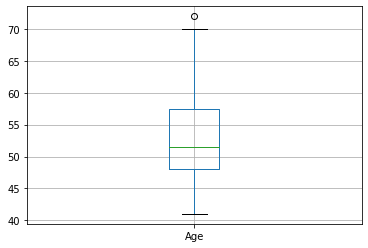

In [20]:
#Print Age boxplot
all_coaches_teams_england.boxplot(column="Age")
plt.show()

---

## RQ4

In [21]:
# Generate England_Players DataFrame
england_teams_ID_list = list(teams_england['wyId']) # list teams Id
player_list =[]
for x in england_teams_ID_list:
    player_list.append(players[players['currentTeamId'] ==x ])

england_players = pd.concat(player_list) #DF with England Players info

In [22]:
# Generate England_Events DataFrame
england_players_ID_list = list(england_players['wyId'])
event_list =[]
for x in england_players_ID_list:
    event_list.append(premier_league_events[premier_league_events['playerId'] == x ])

england_events = pd.concat(event_list) #DF with England Events info

In [23]:
england_events_pass = england_events[england_events['eventName']=='Pass'] # sub-DataFrame with player 'passes'

In [24]:
count_total_pass = {} # dict containing the sums of pass for each player initialized to 0
count_accurate_pass = {} # dict containing the sums of accurate pass for each player initialized to 0
count_ratio_pass = {} # dict containing the ratio = count_accurate_pass/count_total_pass

# initialize
for x in england_players_ID_list:
    
    count_total_pass.update({x:0})
    count_accurate_pass.update({x:0})
    count_ratio_pass.update({x:0})

# count
i = 0
for x in england_events_pass['playerId']:

    count_total_pass[x] += 1
    if str(england_events_pass['tags'].iloc[i]).find('1801') > 0:
        count_accurate_pass[x] += 1
    i +=1    

In [25]:
n = 1000 # minimum threshold

for x in england_players_ID_list: 
    if count_total_pass[x] < n:
        del count_ratio_pass[x]
    else:
        count_ratio_pass[x] = count_accurate_pass[x] / count_total_pass[x]

In [26]:
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())]

In [27]:
# PRINT
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())[-10:]] # list of id players to print
for i in player_pass:
    print(players[players['wyId']==i]['shortName'].iloc[0])

D. Lovren
Fernandinho
M. Demb\u00e9l\u00e9
\u0130. G\u00fcndo\u011fan
N. Otamendi
P. Jones
A. Christensen
V. Kompany
F. Delph
J. Stones


---

## RQ5

In [28]:
england_events_air_duel = england_events[england_events['subEventName']=='Air duel'] # sub-DataFrame with player 'passes'

In [29]:
count_total_air_duel = {} # dict containing the sums of air_duel for each player initialized to 0
count_accurate_air_duel = {} # dict containing the sums of accurate air_duel for each player initialized to 0
count_ratio_air_duel = {} # dict containing the ratio = count_accurate_air_duel/count_total_air_duel

# initialize
for x in england_players_ID_list:
    count_total_air_duel.update({x:0})
    count_accurate_air_duel.update({x:0})
    count_ratio_air_duel.update({x:0})

# count
i = 0
for x in england_events_air_duel['playerId']:
    count_total_air_duel[x] += 1
    if str(england_events_air_duel['tags'].iloc[i]).find('1801') > 0:
        count_accurate_air_duel[x] += 1
    i +=1    

In [30]:
n = 10 # minimum threshold

for x in england_players_ID_list: 
    if count_total_air_duel[x] < n:
        del count_ratio_air_duel[x]
    else:
        count_ratio_air_duel[x] = count_accurate_air_duel[x] / count_total_air_duel[x]

In [31]:
# Create player_ratio_air_duel DataFrame
lst_player = []
lst_ratio_air_duel = []
for x in count_ratio_air_duel:
    lst_player.append(x)
    lst_ratio_air_duel.append(count_ratio_air_duel[x])
player_ratio_air_duel = pd.DataFrame({'PlayersId':lst_player, 'Ratio air duel': lst_ratio_air_duel})

In [32]:
# Merge player_ratio_air_duel with England Players
air_duel_height = pd.merge(player_ratio_air_duel, england_players[['height', 'wyId', 'shortName']], left_on='PlayersId', right_on='wyId' )

In [33]:
list_id = []
list_class = []
for i in range(len(players['height'])):
    if players.iloc[i]['height'] < 160:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(150)
    elif players.iloc[i]['height'] >= 160 and players.iloc[i]['height'] < 170:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(160)
    elif players.iloc[i]['height'] >= 170 and players.iloc[i]['height'] < 175:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(170)
    elif players.iloc[i]['height'] >= 175 and players.iloc[i]['height'] < 180:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(175)
    elif players.iloc[i]['height'] >= 180 and players.iloc[i]['height'] < 185:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(180)
    elif players.iloc[i]['height'] >= 185 and players.iloc[i]['height'] < 190:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(185)
    elif players.iloc[i]['height'] >= 190 and players.iloc[i]['height'] < 195:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(190)
    elif players.iloc[i]['height'] >= 195 and players.iloc[i]['height'] < 200:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(195)
    else:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(205)

clas = pd.DataFrame(data = list_class, index = list_id, columns=['Class'])
air_duel_height_class = pd.merge(air_duel_height, clas, left_on='PlayersId', right_index=True )

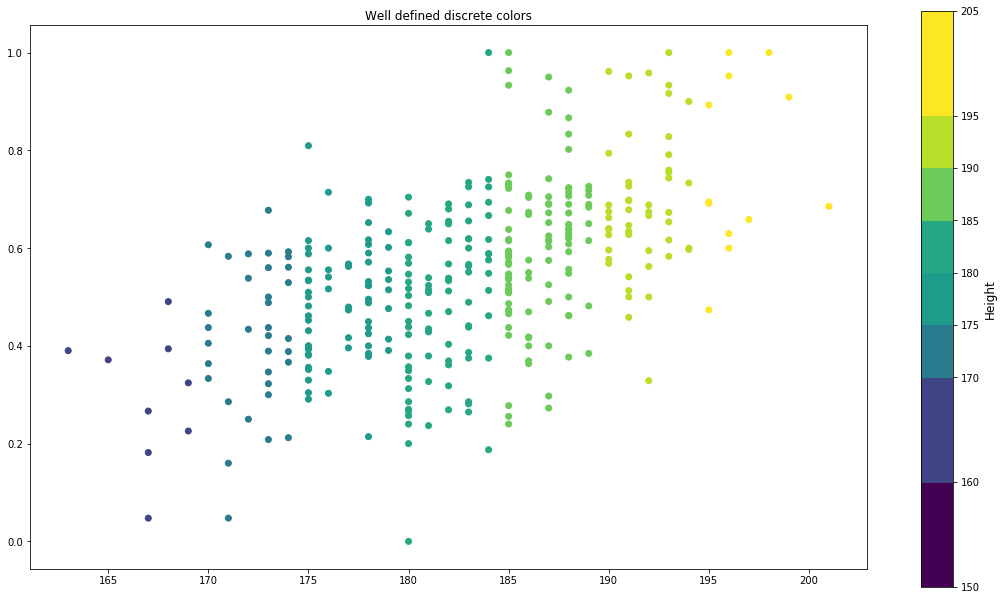

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # setup the plot

x = air_duel_height_class['height']  # define the data
y = air_duel_height_class['Ratio air duel']  # define the data
tag = air_duel_height_class['Class']
#tag[10:12] = 0  # make sure there are some 0 values to show up as grey

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
#cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist=[0,1,2,3,4,5,6,7,8]
cmaplist[0] = (0.267004, 0.004874, 0.329415, 1.)
cmaplist[1] = (0.262138, 0.242286, 0.520837, 1.)
cmaplist[2] = (0.177423, 0.437527, 0.557565, 1.)
cmaplist[3] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[4] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[5] = (0.166383, 0.690856, 0.496502, 1.)
cmaplist[6] = (0.525776, 0.833491, 0.288127, 1.)
cmaplist[7] = (0.762373, 0.876424, 0.137064, 1.)
cmaplist[8] = (0.993248, 0.906157, 0.143936, 1.)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
   'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds =  np.array([150,160,170,175,180,185,190,195,205])#np.linspace(0, 5, 6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x, y, c=tag, 
                  cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Height', size=12)
plt.show()

                            OLS Regression Results                            
Dep. Variable:         Ratio air duel   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     162.1
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           7.99e-31
Time:                        13:29:30   Log-Likelihood:                 179.42
No. Observations:                 355   AIC:                            -354.8
Df Residuals:                     353   BIC:                            -347.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0797      0.206    -10.073      0.0

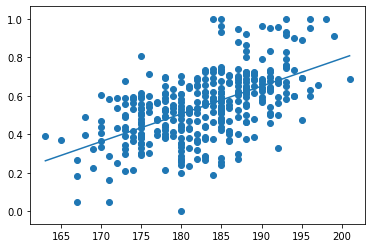

In [36]:
X = air_duel_height_class['height']  # define the data
Y = air_duel_height_class['Ratio air duel']  # define the data

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(155,215,100)

plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.show()

---

## RQ6

---

## CRQ1

In [37]:
# CREATE CRQ1_df DataFrame with only goals event with playerId,teamId, 'matchPeriod', 'eventSec'
CRQ1_df = premier_league_events[['tags', 'playerId', 'teamId', 'matchPeriod', 'eventSec']]

CRQ1_list = [] # list contain the row with 101 tag
for x in range(len(premier_league_events['tags'])):
    if {'id': 101} in CRQ1_df.tags[x]:
        CRQ1_list.append(CRQ1_df.iloc[x]) # append row with 101 tag at CRQ1_list
CRQ1_df = pd.DataFrame(CRQ1_list) # dataset with only goals event
CRQ1_df.index = range(len(CRQ1_df.index)) # set index
CRQ1_df = CRQ1_df[['playerId','teamId','matchPeriod', 'eventSec']] # remove column 'tag'

In [38]:
# Divide time to interval
import intervals as I
CRQ1_df['matchPeriod'].to_string
pd.set_option('mode.chained_assignment', None)
for x in range(len(CRQ1_df['eventSec'])):
    if CRQ1_df['matchPeriod'][x] == '1H':
        if (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(0,9):
            CRQ1_df['matchPeriod'].iloc[x] = '[0-09)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(9,18):
            CRQ1_df['matchPeriod'].iloc[x] = '[09-18)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(18,27):
            CRQ1_df['matchPeriod'].iloc[x] = '[18-27)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(27,36):
            CRQ1_df['matchPeriod'].iloc[x] = '[27-36)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(36,45):
            CRQ1_df['matchPeriod'].iloc[x] = '[36-45)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) >= 45:
            CRQ1_df['matchPeriod'].iloc[x] = '[45+)'
    elif CRQ1_df['matchPeriod'][x] == '2H':
        if (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(0,9):
            CRQ1_df['matchPeriod'].iloc[x] = '[45-54)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(9,18):
            CRQ1_df['matchPeriod'].iloc[x] = '[54-63)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(18,27):
            CRQ1_df['matchPeriod'].iloc[x] = '[63-72)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(27,36):
            CRQ1_df['matchPeriod'].iloc[x] = '[72-81)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(36,46):
            CRQ1_df['matchPeriod'].iloc[x] = '[81-90)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) >= 45:
            CRQ1_df['matchPeriod'].iloc[x] = '[90+)'
    elif CRQ1_df['matchPeriod'][x] == 'E1':
         CRQ1_df['matchPeriod'].iloc[x] = '[45+)'
    elif CRQ1_df['matchPeriod'][x] == 'E2':
         CRQ1_df['matchPeriod'].iloc[x] = '[90+)'
    else:
        pass
CRQ1_df = CRQ1_df[['playerId','teamId','matchPeriod']] # delete 'eventSec'

In [39]:
# Sorted intervl period and count numbers of same interval
interval = sorted(list(set(list(CRQ1_df['matchPeriod']))))
count_interval = []
for x in interval:
    count_interval.append(len(CRQ1_df[CRQ1_df['matchPeriod']==x]))

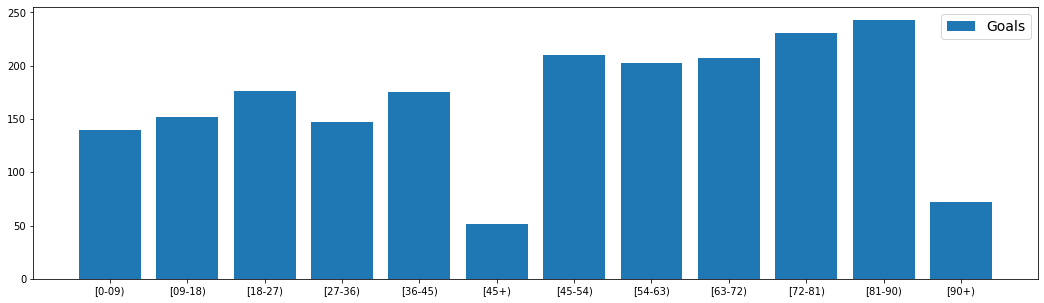

In [40]:
# Show bar plot
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(interval, count_interval, label = 'Goals')

ax.legend(fontsize = 14)
plt.show()

In [41]:
# Create DataFrame by interval of 81-90 and sorted it
Team_81_90 =CRQ1_df[CRQ1_df['matchPeriod']=='[81-90)']
team_81_90 = sorted(list(set(list(Team_81_90['teamId']))))

In [42]:
# count numbers of goals in interval of 81-90 for each team
count_team_81_90 = {}
for x in team_81_90:
    count_team_81_90.update({x:len(Team_81_90[Team_81_90['teamId']==x])})

In [43]:
# sorted dictionary of teams and goals number by goal numbers
count_team_81_90
sorted_count_team_81_90 = sorted(count_team_81_90.items(), key=operator.itemgetter(1))

In [44]:
#create a list team for find the top 10 teams score the most in interval 81-90
list_Teams=[]
for x in sorted_count_team_81_90[-10:]:
    list_Teams.append(x[0])

In [45]:
#top 10 teams score the most in interval 81-90
for x in list_Teams:
    print(teams[teams['wyId']==x]['officialName'].iloc[0])

Manchester United FC
Everton FC
AFC Bournemouth
Chelsea FC
Liverpool FC
Crystal Palace FC
West Ham United FC
Arsenal FC
Manchester City FC
Watford FC


In [46]:
#create a sorted list of player id and find players that were able to score at least one goal in 8 different intervals.
list_player = sorted(list(set(list(CRQ1_df['playerId']))))
player_8_different_interval=[]
for x in list_player:
    if len(set(list(CRQ1_df[CRQ1_df['playerId']==x]['matchPeriod'])))>=8:
        player_8_different_interval.append(x)
for x in player_8_different_interval:#range(len(Teams)):
    print(players[players['wyId']==x]['shortName'].iloc[0])

\u00c1lvaro Morata
T. Courtois
Adri\u00e1n
\u0141. Fabia\u0144ski
P. \u010cech
R. Lukaku
David de Gea
R. Elliot
J. Butland
Gomes
J. Hart
B. Foster
J. Speroni
W. Zaha
W. Hennessey
K. Schmeichel
S. Mignolet
A. McCarthy
H. Kane
A. Begovi\u0107
J. Pickford
R. Sterling
N. Pope
J. Vardy
M. Arnautovi\u0107
L. Karius
Roberto Firmino
H. Lloris
A. Lacazette
R. Mahrez
J. L\u00f6ssl
M. Ryan
F. Forster
Ederson
O. Karnezis
Mohamed Salah
Gabriel Jesus


---

## CRQ2

+ **First Part:**

In [47]:
Match_Barcelona_RealMadrid = laliga_matches[laliga_matches['label'] == 'Barcelona - Real Madrid, 2 - 2'].iloc[0]
id_Match_Barcelona_RealMadrid = Match_Barcelona_RealMadrid['wyId']

Player_L_Messi = players[players['shortName']=='L. Messi'].iloc[0]
id_L_Messi = Player_L_Messi['wyId']
Player_C_Ronaldo = players[players['shortName']=='Cristiano Ronaldo'].iloc[0]
id_C_Ronaldo = Player_C_Ronaldo['wyId']

In [48]:
Event_Ronaldo = laliga_events[(laliga_events['playerId']==id_C_Ronaldo)&(laliga_events['matchId']==id_Match_Barcelona_RealMadrid)]
Event_Messi = laliga_events[(laliga_events['playerId']==id_L_Messi)&(laliga_events['matchId']==id_Match_Barcelona_RealMadrid)]

In [49]:
Event_Ronaldo = Event_Ronaldo[(Event_Ronaldo['eventName']=='Duel')|(Event_Ronaldo['eventName']=='Free Kick')|
                              (Event_Ronaldo['eventName']=='Pass')|(Event_Ronaldo['eventName']=='Shot')]
Event_Messi = Event_Messi[(Event_Messi['eventName']=='Duel')|(Event_Messi['eventName']=='Free Kick')|
                          (Event_Messi['eventName']=='Pass')|(Event_Messi['eventName']=='Shot')]

In [50]:
Positions_Event_Ronaldo =  Event_Ronaldo['positions']
Positions_Event_Messi = Event_Messi['positions']

In [51]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

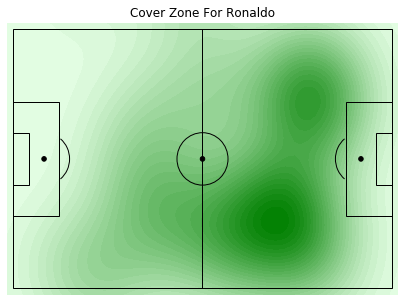

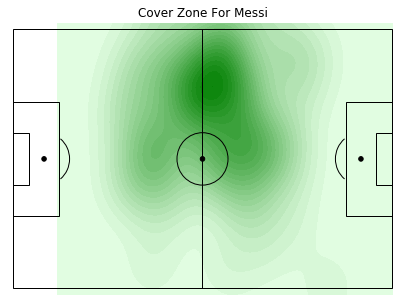

In [52]:
fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Cover Zone For Ronaldo')
plt.axis('off')

x_coord = [i[0]['x'] for i in Positions_Event_Ronaldo]
y_coord = [i[0]['y'] for i in Positions_Event_Ronaldo]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
seaborn.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()


fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Cover Zone For Messi')

plt.axis('off')

x_coord = [i[0]['x'] for i in Positions_Event_Messi]
y_coord = [i[0]['y'] for i in Positions_Event_Messi]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
seaborn.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

**LUCA COMMENT:** [...]

+ **Second Part:**

In [53]:
Match_Juventus_Napoli = serie_a_matches[serie_a_matches['label'] == 'Juventus - Napoli, 0 - 1'].iloc[0]
id_Match_Juventus_Napoli = Match_Juventus_Napoli['wyId']

Player_Jorginho = players[players['shortName']=='Jorginho'].iloc[0]
id_Jorginho = Player_Jorginho['wyId']
Player_Miralem_Pjanic = players[players['firstName']=='Miralem'].iloc[0]
id_Miralem_Pjanic = Player_Miralem_Pjanic['wyId']

In [54]:
Event_Jorginho = serie_a_events[(serie_a_events['playerId']==id_Jorginho)&(serie_a_events['matchId']==id_Match_Juventus_Napoli)]
Event_Miralem_Pjanic = serie_a_events[(serie_a_events['playerId']==id_Miralem_Pjanic)&(serie_a_events['matchId']==id_Match_Juventus_Napoli)]

In [55]:
Pass_Jorginho = Event_Jorginho[Event_Jorginho['eventName']=='Pass']
Accurate_Pass_Jorginho_list = [] # list contain the row with 1801 tag
for x in range(len(Pass_Jorginho['tags'])):
    if {'id': 1801} in Pass_Jorginho.tags.iloc[x]:
        Accurate_Pass_Jorginho_list.append(Pass_Jorginho.iloc[x])
Accurate_Pass_Jorginho = pd.DataFrame(Accurate_Pass_Jorginho_list)
Pass_Miralem_Pjanic = Event_Miralem_Pjanic[Event_Miralem_Pjanic['eventName']=='Pass']
Accurate_Pass_Miralem_Pjanic_list = [] # list contain the row with 1801 tag
for x in range(len(Pass_Miralem_Pjanic['tags'])):
    if {'id': 1801} in Pass_Miralem_Pjanic.tags.iloc[x]:
        Accurate_Pass_Miralem_Pjanic_list.append(Pass_Miralem_Pjanic.iloc[x])
Accurate_Pass_Miralem_Pjanic = pd.DataFrame(Accurate_Pass_Miralem_Pjanic_list)

In [56]:
Positions_Pass_Jorginho = Pass_Jorginho['positions']
Positions_Accurate_Pass_Jorginho = Accurate_Pass_Jorginho['positions']
Positions_Pass_Miralem_Pjanic = Pass_Miralem_Pjanic['positions']
Positions_Accurate_Pass_Miralem_Pjanic = Accurate_Pass_Miralem_Pjanic['positions']

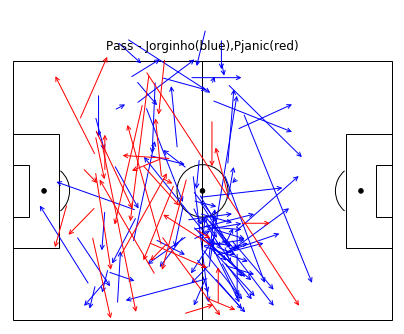

In [57]:
fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Pass - Jorginho(blue),Pjanic(red)')
plt.axis('off')
for i in range(len(Positions_Pass_Jorginho)):
    ax.annotate("",xy=(Positions_Pass_Jorginho.iloc[i][1]['x'],Positions_Pass_Jorginho.iloc[i][1]['y']), xytext=(Positions_Pass_Jorginho.iloc[i][0]['x'],Positions_Pass_Jorginho.iloc[i][0]['y']), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
    
for i in range(len(Positions_Pass_Miralem_Pjanic)):
    ax.annotate("",xy=(Positions_Pass_Miralem_Pjanic.iloc[i][1]['x'],Positions_Pass_Miralem_Pjanic.iloc[i][1]['y']), xytext=(Positions_Pass_Miralem_Pjanic.iloc[i][0]['x'],Positions_Pass_Miralem_Pjanic.iloc[i][0]['y']), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red")) 

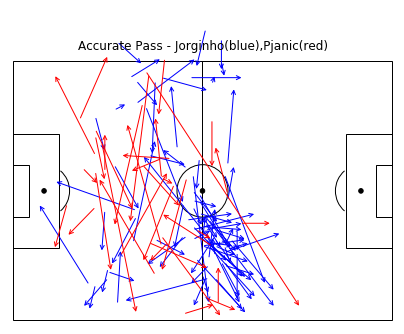

In [58]:
fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Accurate Pass - Jorginho(blue),Pjanic(red)')
plt.axis('off')
for i in range(len(Positions_Accurate_Pass_Jorginho)):
    ax.annotate("",xy=(Positions_Accurate_Pass_Jorginho.iloc[i][1]['x'],Positions_Accurate_Pass_Jorginho.iloc[i][1]['y']), xytext=(Positions_Accurate_Pass_Jorginho.iloc[i][0]['x'],Positions_Accurate_Pass_Jorginho.iloc[i][0]['y']), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
    
for i in range(len(Positions_Accurate_Pass_Miralem_Pjanic)):
    ax.annotate("",xy=(Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][1]['x'],Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][1]['y']), xytext=(Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][0]['x'],Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][0]['y']), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red")) 

**LUCA COMMENT:** [...]

---

## Theoretical Question